# ***Quantitative Evaluation***

This notebook shows the process of performing quantitative evaluation on the results.

### ***Import packages***

Before we begin, let's import all the necessary packages for this notebook:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as s_metrics
from matplotlib import pyplot as plt

# Set plotting theme
sns.set_theme(style="whitegrid")

### ***Read data***

Next, let's read the data:

In [2]:
# Read the results csv
results = pd.read_csv("results.csv")

# Read data
hate_target_groups = results[~results.hate_target_label.isna(
)].hate_target_label.unique()
hate_target_groups = np.append(hate_target_groups, "other")

# Fix unwanted targets in zero-shot
results.loc[results["Zero-Shot Hate Target Detection"] == "SouthernKimmy",
            "Zero-Shot Hate Target Detection"] = "females"
results.loc[results["Zero-Shot Hate Target Detection"] == "hollywood industry",
            "Zero-Shot Hate Target Detection"] = "other"
results.loc[results["Zero-Shot Hate Target Detection"] == "Cenk Uygur",
            "Zero-Shot Hate Target Detection"] = "other"
results.loc[results["Zero-Shot Hate Target Detection"] ==
            "people who are concerned about gender identity indoctrination",
            "Zero-Shot Hate Target Detection"] = "other"
results.loc[results["Zero-Shot Hate Target Detection"] ==
            "Alexis McGill Johnson",
            "Zero-Shot Hate Target Detection"] = "other"
results.loc[results["Zero-Shot Hate Target Detection"] == "non-jews (joyim)",
            "Zero-Shot Hate Target Detection"] = "other"

# Fix unwanted targets in one-shot
results.loc[results["One-Shot Hate Target Detection"] ==
            "females (person referred to SouthernKimmy)",
            "One-Shot Hate Target Detection"] = "females"
results.loc[results["One-Shot Hate Target Detection"] == "Cenk Uygur",
            "One-Shot Hate Target Detection"] = "other"
results.loc[results["One-Shot Hate Target Detection"] ==
            "Alexis McGill Johnson", "One-Shot Hate Target Detection"] = "other"
results.loc[results["One-Shot Hate Target Detection"] == "police officer",
            "One-Shot Hate Target Detection"] = "other"
results.loc[results["One-Shot Hate Target Detection"] == "non-jews (joyim)",
            "One-Shot Hate Target Detection"] = "other"

# Fix unwanted targets in few-shot
results.loc[results["Few-Shot Hate Target Detection"] ==
            "females (person referred to SouthernKimmy)",
            "Few-Shot Hate Target Detection"] = "females"
results.loc[results["Few-Shot Hate Target Detection"] == "Cenk Uygur",
            "Few-Shot Hate Target Detection"] = "other"
results.loc[results["Few-Shot Hate Target Detection"] == "non-jews (joyim)",
            "Few-Shot Hate Target Detection"] = "other"


### ***Get precision, recall and f1-score***

Next, let's get precision, recall and f1-score for hate detection:

In [3]:
# Loop over each prompt type
for prompt_type in ["Zero", "One", "Few"]:
  # Get metrics
  precision = round(
      s_metrics.precision_score(
          results["hate_label"], results[f"{prompt_type}-Shot Hate Detection"], pos_label="yes"
      ), 3
  )
  recall = round(
      s_metrics.recall_score(
          results["hate_label"], results[f"{prompt_type}-Shot Hate Detection"], zero_division=0, pos_label="yes"
      ), 3
  )
  f1 = round(
      s_metrics.f1_score(
          results["hate_label"], results[f"{prompt_type}-Shot Hate Detection"], pos_label="yes"
      ), 3
  )
  # Print metrics
  print(
      f"{prompt_type}-Shot: precision({precision}), recall({recall}), F1({f1})",
      end="\n\n"
  )


Zero-Shot: precision(0.952), recall(1.0), F1(0.976)

One-Shot: precision(0.792), recall(0.95), F1(0.864)

Few-Shot: precision(0.95), recall(0.95), F1(0.95)



Next, let's get precision, recall and f1-score for hate target detection:

In [4]:
# Get only hate records
hate_results = results[results.hate_label == "yes"]
# Loop over each prompt type
for prompt_type in ["Zero", "One", "Few"]:
  # Get metrics
  precision = round(
      s_metrics.precision_score(
          hate_results["hate_target_label"],
          hate_results[f"{prompt_type}-Shot Hate Target Detection"],
          average="micro"
      ), 3
  )
  recall = round(
      s_metrics.recall_score(
          hate_results["hate_target_label"],
          hate_results[f"{prompt_type}-Shot Hate Target Detection"],
          average="micro", zero_division=0
      ), 3
  )
  f1 = round(
      s_metrics.f1_score(
          hate_results["hate_target_label"],
          hate_results[f"{prompt_type}-Shot Hate Target Detection"],
          average="micro"
      ), 3
  )
  print(
      f"{prompt_type}-Shot: precision({precision}), recall({recall}), F1({f1})",
      end="\n\n"
  )


Zero-Shot: precision(0.75), recall(0.75), F1(0.75)

One-Shot: precision(0.85), recall(0.85), F1(0.85)

Few-Shot: precision(0.9), recall(0.9), F1(0.9)



### ***Plot Confusion matrices***

Next, let's plot confusion matrices for hate detection:

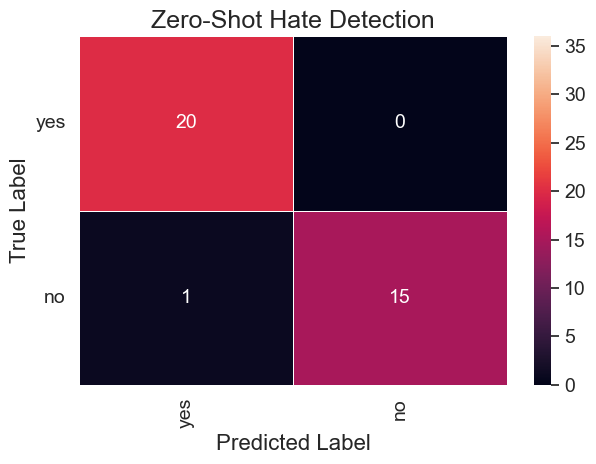

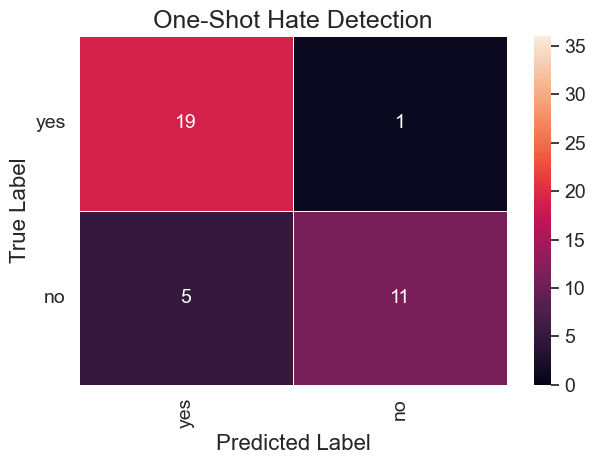

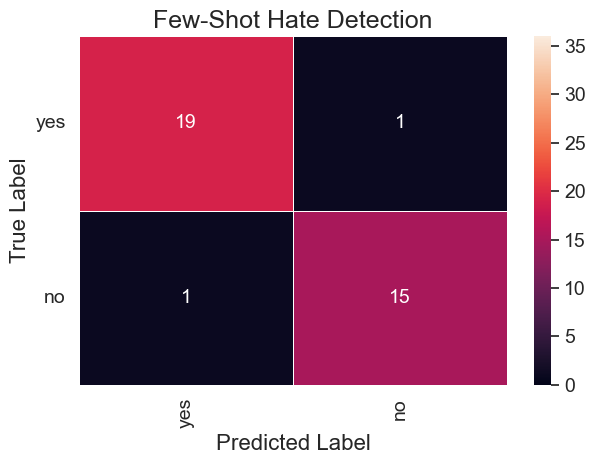

In [5]:
# Define confusion matrix labels
labels = ["yes", "no"]

# Loop over each prompt type
for prompt_type in ["Zero", "One", "Few"]:
  # Plot confusion matrix
  col = f"{prompt_type}-Shot Hate Detection"
  cm = s_metrics.confusion_matrix(
      results["hate_label"], results[col], labels=labels
  )
  ax = sns.heatmap(
      cm, annot=True, linewidths=0.5, annot_kws={"size": 14},
      xticklabels=labels, yticklabels=labels, vmin=0, vmax=36
  )
  ax.set_ylabel("True Label", fontsize=16)
  ax.set_xlabel("Predicted Label", fontsize=16)
  ax.set_title(col, fontsize=18)
  cbar = ax.collections[0].colorbar
  cbar.ax.tick_params(labelsize=14)
  plt.xticks(fontsize=14, rotation=90)
  plt.yticks(fontsize=14, rotation=0)
  plt.tight_layout()
  plt.show()

Next, let's plot confusion matrices for hate target detection:

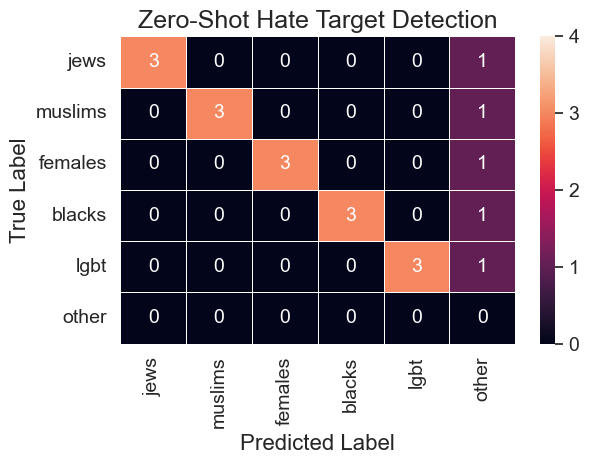

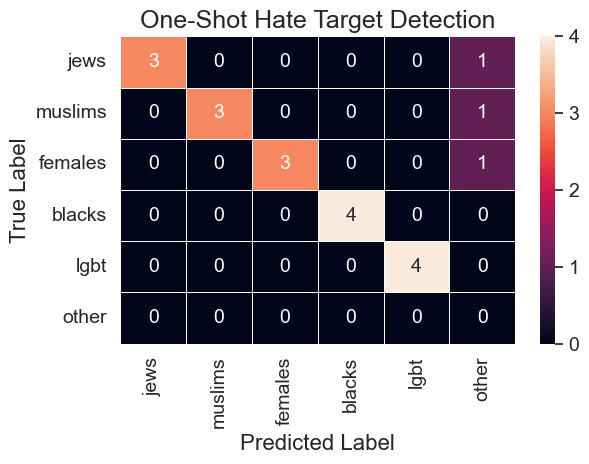

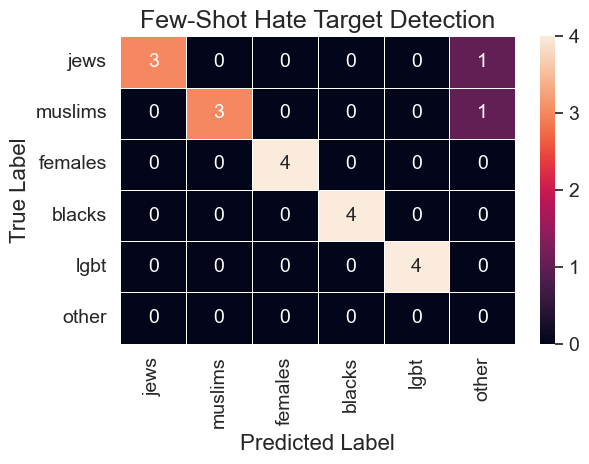

In [6]:
# Get only hate records
hate_results = results[results.hate_label == "yes"]
# Define confusion matrix labels
labels = hate_target_groups
# Loop over each prompt type
for prompt_type in ["Zero", "One", "Few"]:
  # Plot confusion matrix
  col = f"{prompt_type}-Shot Hate Target Detection"
  cm = s_metrics.confusion_matrix(
      hate_results["hate_target_label"], hate_results[col], labels=labels
  )
  ax = sns.heatmap(
      cm, annot=True, linewidths=0.5, annot_kws={"size": 14}, vmin=0, vmax=4,
      xticklabels=labels, yticklabels=labels
  )
  ax.set_ylabel("True Label", fontsize=16)
  ax.set_xlabel("Predicted Label", fontsize=16)
  ax.set_title(col, fontsize=18)
  cbar = ax.collections[0].colorbar
  cbar.ax.tick_params(labelsize=14)
  plt.xticks(fontsize=14, rotation=90)
  plt.yticks(fontsize=14, rotation=0)
  plt.tight_layout()
  plt.show()